In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
torch.manual_seed(0)

In [2]:
words = open('names.txt').read().splitlines() # split between /n

In [3]:
chars =sorted(list(set(''.join(words))))

chars2val = {s:i+1 for i, s in enumerate(chars)}
chars2val['.'] = 0
chars2val
char_list = {i:s for s, i in chars2val.items()}

In [100]:
# create training data x and y 
block_size = 3
X,Y=[], []
for j in words:
    context = [0]*block_size

    for ch in j +'.':
        Y.append(chars2val[ch])
        X.append(context)
        context = context[1:] + [chars2val[ch]] #..e->m  sliding window

print(X[0:5])
print("-----")
print(Y[0:5])

# transform to tensor
X = torch.tensor(X)
Y = torch.tensor(Y)

[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1]]
-----
[5, 13, 13, 1, 0]


In [101]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [32]:
C = torch.rand(27, 2)
C

tensor([[0.1089, 0.2379],
        [0.9037, 0.0942],
        [0.4641, 0.9946],
        [0.6806, 0.5142],
        [0.0667, 0.7477],
        [0.1439, 0.3581],
        [0.3322, 0.4260],
        [0.5055, 0.9124],
        [0.5624, 0.9478],
        [0.8059, 0.1839],
        [0.7243, 0.1466],
        [0.2881, 0.6471],
        [0.6651, 0.8751],
        [0.3390, 0.5008],
        [0.7574, 0.0165],
        [0.8615, 0.0865],
        [0.5069, 0.4150],
        [0.2367, 0.5661],
        [0.9135, 0.3538],
        [0.2032, 0.3151],
        [0.0044, 0.7257],
        [0.2599, 0.1663],
        [0.2119, 0.7875],
        [0.7648, 0.8838],
        [0.6814, 0.3330],
        [0.3603, 0.6477],
        [0.9110, 0.6359]])

In [87]:
# w1, w2, w3
w1 = torch.rand((6, 100))
b1 = torch.rand(100)

In [17]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
print(h.shape)

torch.Size([32, 100])


In [134]:
g = torch.Generator().manual_seed(2143)
C = torch.rand(27, 2, generator=g)
w1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g) 
w2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, w1,b1,w2,b2]

for p in parameters:
    p.requires_grad = True

In [83]:
torch.randint(0, X.shape[0], (32,)) # idx 

tensor([154854,  90824, 167447, 195297, 176877,  49907,  59336, 124950, 216325,
         58645, 193878, 123914,   3872, 169289, 126549, 127850,  68921, 192859,
         36008, 170907,  58205, 148093,  36247, 146165,  45734, 161202,  92837,
        116498,   2127,  95071, 181257, 118185])

In [86]:
# use min-batch 
for _ in range(100):
    ix = torch.randint(0, X.shape[0], (32,)) # 32 examples each time
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2 
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward 
    for p in parameters:
        p.grad = None
    loss.backward()
    # update p 
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

3.2926504611968994


## Determine learing rate

In [135]:
# since we only select parts of the sample, the gradient won't decrease smoothly, may bounce around. 
# define lr using torch.linspace
lr = torch.linspace(-3, 0, 1000)
lre =10**lr
lre

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [140]:
lri = []
lossi = []
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,)) # 32 examples each time
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2 
    loss = F.cross_entropy(logits, Y[ix])
    # backward 
    for p in parameters:
        p.grad = None
    loss.backward()
    # update p 
    # lr = 0.01
    for p in parameters:
        p.data += -lre[i] * p.grad
    lri.append(lre[i])
    lossi.append(loss.item())

print(loss.item())

6.854210376739502


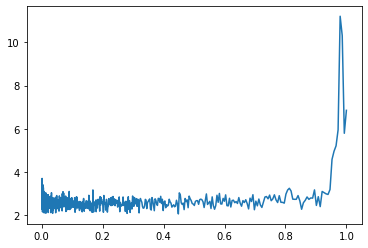

In [141]:
plt.plot(lri, lossi)